# Tugas 3 | Regresi Proses Gaussian

### Konsep Dasar

Gaussian Processes (GP) adalah penggunaan algoritma supervised learning yang dirancang untuk memecahkan masalah klasifikasi regresi dan probabilistik. Terdapat keuntungan dan kerugian ketika sahabat data menerapkan metode ini. Dimulai dari keuntungannya, melakukan prediksi menggunakan Gaussian Processes dapat menginterpolasi pengamatan (setidaknya untuk kernel biasa). Prediksinya bersifat probabilitas (Gaussian) sehingga seseorang dapat menghitung confidence interval dan memutuskan berdasarkan pada seseorang harus mereparasi prediksi di beberapa wilayah yang diminati. Gaussian Processes juga dinilai serbaguna atau versatile. Hal ini karena dengan kernel berbeda dapat ditentukan. Kernel umum memang disediakan, tetapi juga memungkinkan untuk menentukan kernel khusus. Namun kerugiannya ialah mereka menggunakan seluruh sampel untuk melakukan prediksi.

### Implementasi pada Kode Python

Import library

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

Ambil beberapa data agar dapat digunakan.

In [ ]:
iris = datasets.load_iris()

Hanya mengambil pertama diantara dua fitur.

In [ ]:
X = iris.data[:, :2]
y = np.array(iris.target, dtype=int)

Menentukan ukuran jarak yang akan diproses.

In [ ]:
h = 0.02

Atur tampilan warna RGB.

In [ ]:
kernel = 11.0 * RBF([11.0])
gpc_rbf_isotropic = GaussianProcessClassifier(kernel=kernel).fit(X, y)
kernel = 17.0 * RBF([13.0, 15.0])
gpc_rbf_anisotropic = GaussianProcessClassifier(kernel=kernel).fit(X, y)

Buat jaring untuk dilakukan plot.

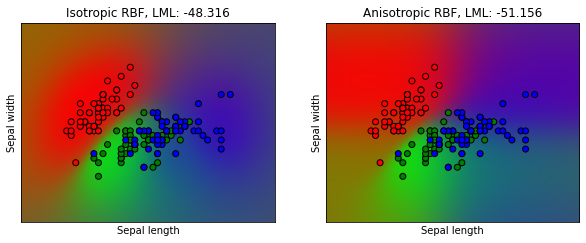

In [ ]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

titles = ["Isotropic RBF", "Anisotropic RBF"]
plt.figure(figsize=(10, 5))
for i, clf in enumerate((gpc_rbf_isotropic, gpc_rbf_anisotropic)):
    # Plot probabilitas yang diprediksi. Untuk itu, kami akan menetapkan warna untuk
    # untuk setiap titik di mesh [x_min, m_max]x[y_min, y_max].
    plt.subplot(1, 2, i + 1)

    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])

    # Masukkan hasilnya ke dalam plot warna
    Z = Z.reshape((xx.shape[0], xx.shape[1], 3))
    plt.imshow(Z, extent=(x_min, x_max, y_min, y_max), origin="lower")

    # Plot juga poin train
    plt.scatter(X[:, 0], X[:, 1], c=np.array(["r", "g", "b"])[y], edgecolors=(0, 0, 0))
    plt.xlabel("Sepal length")
    plt.ylabel("Sepal width")
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(
        "%s, LML: %.3f" % (titles[i], clf.log_marginal_likelihood(clf.kernel_.theta))
    )